# Проектная работа

## Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

## Цель проекта

1. Рассчитать метрики трёх видов:
    - продуктовые
    - метрики электронной коммерции
    - маркетинговые
2. Отобразите на графиках изменения каждой метрики во времени
3. Сформулировать выводы и рекомендации на основе рассчитанных метрик

## Шаг 1. Загрузка данных и подготовка их к анализу

### Загрузка данных

Здесь будут импортированы все библиотеки, которые я использую в проектной работе:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

Загрузка данных в одноименные переменные и первый взгляд на них:

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
costs = pd.read_csv('/datasets/costs.csv')
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [5]:
visits = visits.drop_duplicates()
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 16.5+ MB


In [6]:
orders = orders.drop_duplicates()
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


In [7]:
costs = costs.drop_duplicates()
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 79.4+ KB


**Вывод:** 
- У нас нет пропусков ни в одной из баз данных.
- Для "visits" и "orders" нам нужно привести названия столбцов к нижнему регистру и заменить пробелы на нижние подчеркивания.
- Дубликатов ни в одной из таблиц не найдено.
- Формат столбов visits['End Ts'], visits['End Ts'], orders['Buy Ts'] и costs['dt'] необходимо изменить на datetime.

### Подготовка данных

Внесем изменения в базы данных, перечисленные выше:

#### Изменение названий столбцов

In [8]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 16.5+ MB


In [9]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


#### Изменение формата дат

In [10]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 79.4 KB


**Вывод:** Данные подготовлены к работе и я могу начать анализ.

## Шаг 2. Рассчёт метрик и построение графиков

### Продуктовые

#### Рассчёт DAU, WAU и MAU, средние значения и графики

В данной части нашей работы нам понадобится БД "visits". Для начала, нам необходимо выделить информацию о дате, порядковом номере месяца и недели из столбца "start_ts":

P.S. Так же нам надо выделить информацию о годе, т.к., не смотря на то, что данные  у нас за год с 1 июня 2017 по 31 мая 2018, как минимум крайние даты диапазона попадают в 22 неделю и, если мы не разделим эту неделю по году, то мы получим неверные данные.

In [11]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_year,session_month,session_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,12,51
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2,8
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,7,26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,5,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,12,52


Теперь создадим новые переменные, в которых будет храниться количество уникальных посетителей сайта для каждого дня/недели/месяца:

In [12]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})

In [13]:
print('Среднее количество уникальных пользователей в день сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018:',
      int(dau.mean())
     )
print('Среднее количество уникальных пользователей в неделю сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018:',
      int(wau.mean())
     )
print('Среднее количество уникальных пользователей в месяц сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018:',
      int(mau.mean())
     )

Среднее количество уникальных пользователей в день сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018: 907
Среднее количество уникальных пользователей в неделю сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018: 5716
Среднее количество уникальных пользователей в месяц сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018: 23228


Теперь визуализируем данные по уникальным посетителям, для понимания динамики за анализируемый год:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


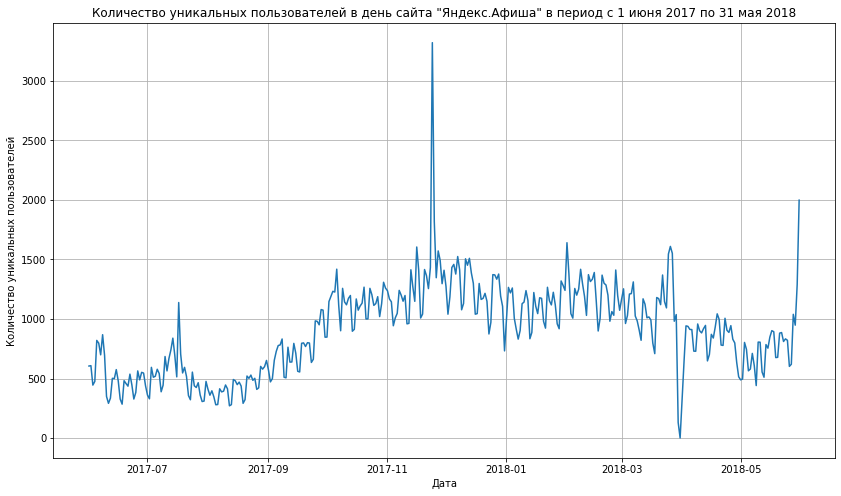

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(dau, label = 'DAU')     
ax.grid()       
ax.set(title='Количество уникальных пользователей в день сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018',
       ylabel= 'Количество уникальных пользователей',
       xlabel = 'Дата')
plt.yticks(np.arange(0, 3500, 500))
plt.show()

**Вывод:** 
- У нас есть выброс 24.11.2017 - при среднем показателе уникальных пользователей в день равный 907, в этот день имеет рекордный показатель 3319! Никаких невероятных премьер или анонсов в этот день я не нашел. Стоит отправить репорт по этому дню?!
- Так же у нас есть день с всего 1 уникальным посетителем за день. Возможно, были проблемы с сервером и он весь день "отдыхал"?

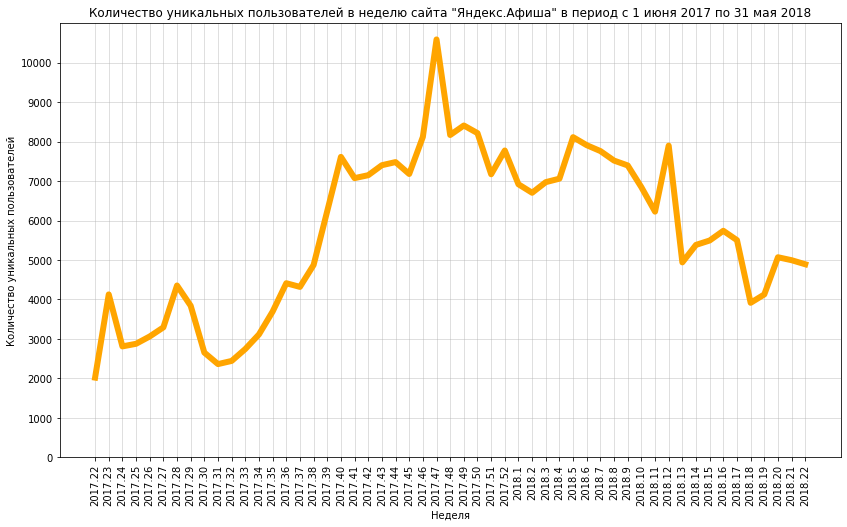

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(wau.reset_index()['uid'], label = 'WAU', color = 'orange', linewidth = 6)     
ax.grid(alpha = 0.5)       
ax.set(title='Количество уникальных пользователей в неделю сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018',
       ylabel= 'Количество уникальных пользователей',
       xlabel = 'Неделя')
plt.yticks(np.arange(0, 11000, 1000))
plt.xticks(range(0, len(wau)), wau.reset_index()['session_year'].astype('str') + '.' + wau.reset_index()['session_week'].astype('str'), rotation = 90)
plt.show()

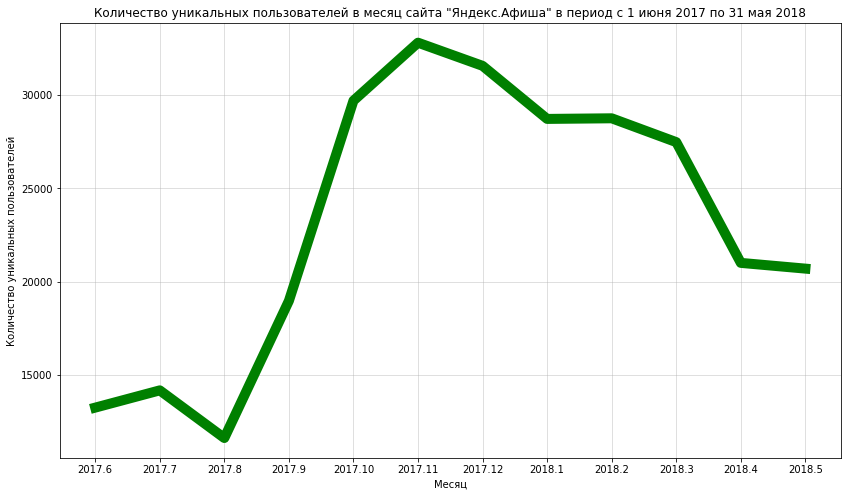

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(mau.reset_index()['uid'], label = 'MAU', color = 'green', linewidth = 10)     
ax.grid(alpha = 0.5)       
ax.set(title='Количество уникальных пользователей в месяц сайта "Яндекс.Афиша" в период с 1 июня 2017 по 31 мая 2018',
       ylabel= 'Количество уникальных пользователей',
       xlabel = 'Месяц')
plt.xticks(range(0, len(mau)), mau.reset_index()['session_year'].astype('str') + '.' + mau.reset_index()['session_month'].astype('str'))
plt.show()

**Общий вывод:**
Графики имеют волнообразный вид, с ростом и пиком в осенне-зимний период и падением и минимальным значением в весенне-летний период. Предположу, что если бы нам были доступны данные за несколько лет, то мы могли бы с большей уверенностью сказать, что это сезонные перепады, связанные с более охотным пребыванием на мероприятиях в помещении типо концертов и кинопоказов в более холодное время года, и отказ от данных мероприятий в прользу времяпрепровождения на природе в более теплое время года.
- 

#### Среднее количество посещений в день для одного пользователя

У меня есть информация по количеству уникальных пользователей в день, есть информация о всех сессиях пользователей. Я посчитаю кол-во сессий для каждого дня и поделю их на кол-во уникальных пользователей в этот день, результатом будет среднее кол-во сессий на пользователя по дням.

In [17]:
avg_sessions = visits.groupby('session_date').agg({'uid': [ 'count', 'nunique']}).reset_index()
avg_sessions.columns = ['session_date', 'n_sessions', 'n_users']
avg_sessions['sessions_per_user'] = avg_sessions['n_sessions'] / avg_sessions['n_users']
avg_sessions['month'] = pd.to_datetime(avg_sessions['session_date']).dt.month
avg_sessions['year'] = pd.to_datetime(avg_sessions['session_date']).dt.year
print('Среднее количество посещений сайта в день одним пользователем:', avg_sessions['sessions_per_user'].mean().round(2))

Среднее количество посещений сайта в день одним пользователем: 1.08


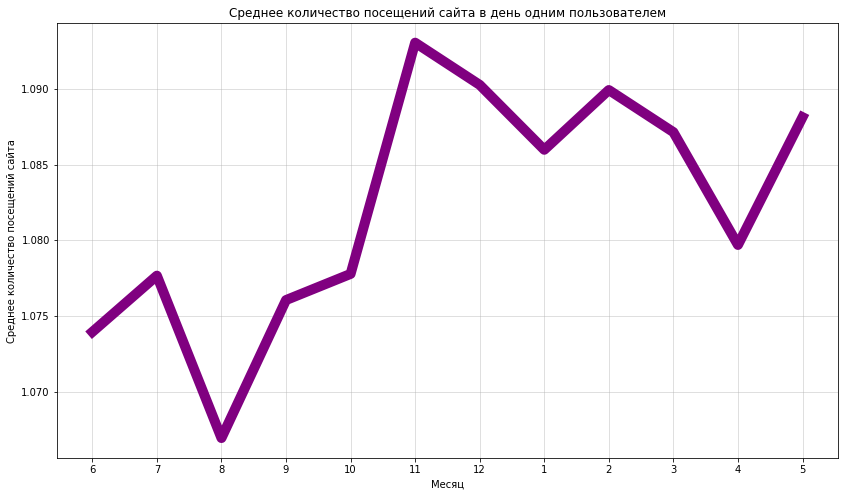

In [18]:
new = avg_sessions.groupby(['year', 'month'])['sessions_per_user'].mean().reset_index() 
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(new['sessions_per_user'], color = 'purple', linewidth = 10)     
ax.grid(alpha = 0.5)       
ax.set(title='Среднее количество посещений сайта в день одним пользователем',
       ylabel= 'Среднее количество посещений сайта',
       xlabel = 'Месяц')
plt.xticks(range(0, len(new)), new['month'])
plt.show()

**Вывод:** 
- Среднее количество посещений сайта в день одним пользователем: 1.08. Получается, что каждый пользователь практически не заходит на сайт несколько раз в день. Но не думаю, что эта метрика отражает качество сайта, скорей это говорит нам о том, что пользователи сайта Яндекс.Афиша не привыкли колебаться в своих решениях и им хватает одной сессии, чтобы определится, хотят они куда-то пойти в ближайшее время или нет, и, если да, то сразу же купить нужные билеты.
- Судя по графику, отображающему средней индекс посещений сайта за день по месяцам, люди начали чуть чаще заходить на сайт повторно за один день, хоть это "чуть" оооооочеть маленькое.

#### Продолжительность типичной пользовательской сессии

В базе данных visits вычтем из даты и времени окончания сессии дату и время начала сессии сессии и сохраним в новом столбце:

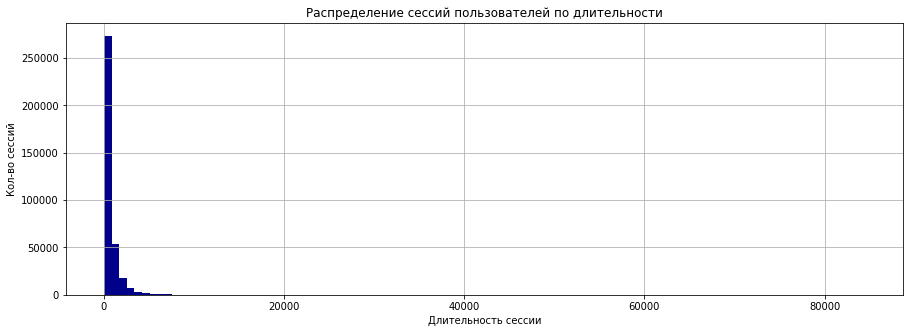

In [19]:
visits['session_duration_sec'] =(visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].hist(bins = 100, color = 'darkblue', figsize = (15, 5)).set(
    title='Распределение сессий пользователей по длительности',
    ylabel= 'Кол-во сессий',
    xlabel = 'Длительность сессии')
plt.show()

Большинство сессий по продолжительности близки к минимальным значениям, поэтому вычислять среднюю продолжительность сессии как при Пуассоновском распределении не стоит, найдем моду, это и будет наша средняя продолжительность сессии:

In [20]:
print('Cредняя продолжительность сессии пользователя сайта Яндекс.Афиша в период с 01.06.2017 по 31.05.2018:',
      visits['session_duration_sec'].median(), 'секунд'
     )

Cредняя продолжительность сессии пользователя сайта Яндекс.Афиша в период с 01.06.2017 по 31.05.2018: 300.0 секунд


**Вывод:** Cредняя продолжительность сессии равна 300 секундам. Довольно низкий показатель для этого сайта. Видимо, пользователи заходят только с целью купить билеты, а с афишой своего города знакомятся где-то еще.

#### Retention Rate

Так как в нашем распоряжении есть информация за год работы сервиса, когорты вполне возможно разделить по месяцам:

In [21]:
first_act_date = visits.groupby(['uid'])['start_ts'].min()
first_act_date.name = 'first_act_date'
user_activity = visits.join(first_act_date, on = 'uid')
user_activity['first_act_month'] = user_activity['first_act_date'].astype('datetime64[M]')
user_activity['session_month'] = user_activity['start_ts'].astype('datetime64[M]')
user_activity['cohort_lifetime'] = ((user_activity['session_month'] - user_activity['first_act_month']) / np.timedelta64(1, 'M')).round().astype('int')


cohorts = user_activity.groupby(['first_act_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_act_month', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on = 'first_act_month')
cohorts['retention_rate'] = cohorts['uid'] / cohorts['cohort_users']
cohorts['first_act_month'] = cohorts['first_act_month'].astype('str')
retention_rate = cohorts.pivot_table(
index = 'first_act_month',
columns = 'cohort_lifetime',
values = 'retention_rate',
aggfunc = 'mean')
retention_rate.round(4).fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_act_month,,,,,,,,,,,,
2017-06-01,1.0,0.0787,0.0538,0.0614,0.0686,0.0714,0.061,0.0578,0.0523,0.0508,0.0407,0.045
2017-07-01,1.0,0.0561,0.0513,0.0562,0.0582,0.0482,0.0454,0.0457,0.0388,0.0286,0.0275,
2017-08-01,1.0,0.0769,0.0629,0.0628,0.0501,0.044,0.0363,0.0395,0.0279,0.026,,
2017-09-01,1.0,0.0855,0.0692,0.0507,0.0394,0.0378,0.0359,0.0242,0.0228,,,
2017-10-01,1.0,0.0786,0.0522,0.039,0.0343,0.0322,0.0214,0.0204,,,,
2017-11-01,1.0,0.0783,0.0441,0.0387,0.0337,0.0234,0.0218,,,,,
2017-12-01,1.0,0.0558,0.038,0.0311,0.0203,0.019,,,,,,
2018-01-01,1.0,0.0597,0.0393,0.025,0.0202,,,,,,,
2018-02-01,1.0,0.0571,0.0255,0.0201,,,,,,,,


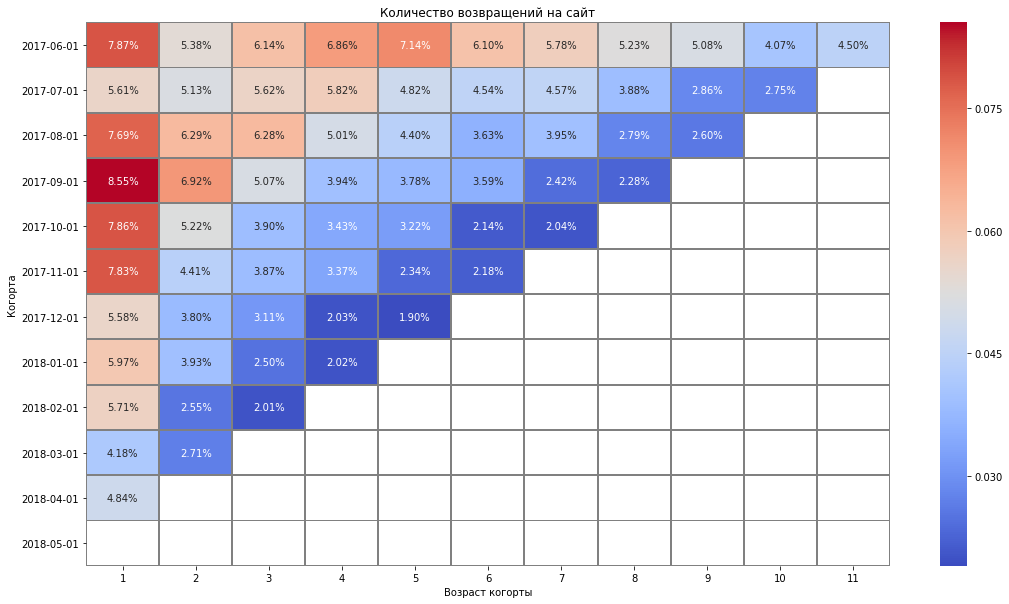

In [22]:
plt.figure(figsize=(18, 10))
sns.heatmap(retention_rate.drop(retention_rate.columns[0], axis=1), annot=True, fmt='.2%', linewidths=1, linecolor='gray', cmap= 'coolwarm').set(
    title='Количество возвращений на сайт',
    ylabel= 'Когорта',
    xlabel = 'Возраст когорты') 
plt.show()

In [23]:
print('Средний Retention Rate на второй месяц «жизни» когорт: {:.2%}'.format(retention_rate[1].mean()))

Средний Retention Rate на второй месяц «жизни» когорт: 6.52%


**Вывод:**
- В среднем, Retention Rate у сайта Яндекс.Афиша на первый взгляд не высок, но, если задуматься, как часто мы ходим на концерты, в театр, оперу и т.д.? Точно не каждый месяц. Уверен, для многих подобные события могут случаться реже раза в год. Если смотреть под таким углом, то, возможно, рейтинг не так уж и плох?
- Самый высокий показатель Retention Rate у сентябрьской когорты и равен он 8.55%
- Средний Retention Rate на второй месяц «жизни» когорт: 6.52%
- Для всех когорт динами Retention Rate отрицательная, но удивляться не стоит, сервис не относится к жизненнонеобходимым в повседневной жизни.
- Retention Rate даже для второго месяца жизни с каждой новой когортой ниже по сравнению с предыдущими. Думаю, это связано с тем, что в более поздних когортах состоят люди, которые какое-то время "сопротивлялись" рекламным кампаниям сайта, значит они менее лояльны и возможность увидеть в них постоянных клиентов ниже.

### Метрики электронной коммерции

#### Среднее временя с момента первого посещения сайта до совершения покупки

Для рассчета данных показателей нам понадобится два имеющихся датафрейма: first_act_date и orders.

In [24]:
orders_first_act = orders.merge(first_act_date, on = 'uid')
orders_first_act['time_before_order_min'] = ((orders_first_act['buy_ts'] - orders_first_act['first_act_date']).dt.seconds) / 60
orders_first_act.head()

,buy_ts,revenue,uid,first_act_date,time_before_order_min
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0


Посмотрим гистограмму для принятия решения, как лучше считать среднее время между первой активностью на сайте и совершением покупки:

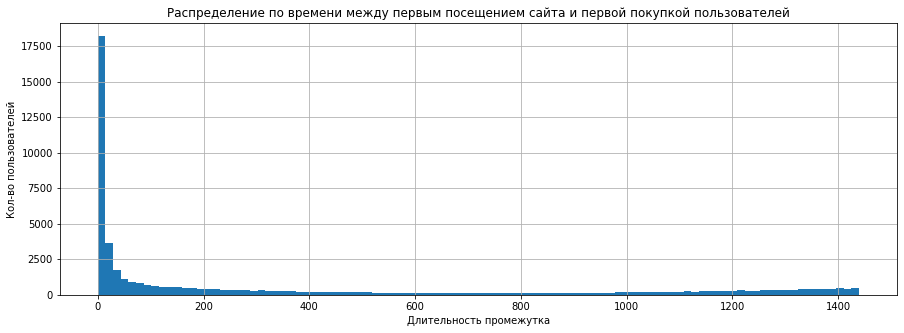

In [25]:
orders_first_act['time_before_order_min'].hist(bins = 100, figsize = (15, 5)).set(
    title='Распределение по времени между первым посещением сайта и первой покупкой пользователей',
    ylabel= 'Кол-во пользователей',
    xlabel = 'Длительность промежутка')
plt.show()

На гистограмме вы видим несколько пиков, один бзизко к нулю, а второй уже у максимальных значений промежутка между первым посещением и первой покупкой. Рост начинается у знаения ~800 минут и продолжается вплоть до макимального значения в более чем 1400 мин. Это связано с тем, что некоторые люди совершают покупку лишь на следующий день, после первого посещения сайта.

Больше трети покупок совершается в течение минуты после посещения сайта - судя по всему, это пользователи, которые были перенаправленны на сайт Яндекс.Афиши с других ресурсов уже непосредственно для оформления покупки, в таком случае, лучше считать моду и мы получаем, что среднее время между первым посещением и покупкой:

In [26]:
orders_first_act['time_before_order_min'].mode()[0]

1.0

In [27]:
(orders_first_act[orders_first_act['time_before_order_min'] < 60]['time_before_order_min'].count()/len(orders_first_act)).round(2)

0.49

Но, на мой взгляд, стоит так же посмотреть данный показатель для пользователей, которые работали непосредственно с сайтом перед покупкой, при этом, считаю, что стоит смотреть на медиану, а не среднее, т.к. довольно много пользователей, которые совершают покупку лишь на следующий день, после посещения сайта:

In [28]:
orders_first_act[orders_first_act['time_before_order_min'] > 1]['time_before_order_min'].median()

114.0

In [29]:
(orders_first_act[orders_first_act['time_before_order_min'] > 800]['time_before_order_min'].count()/len(orders_first_act)).round(2)

0.22

**Вывод:** 
- Больше 1/3 покупок совершается в течение минуты после первой активности на сайте. 
- Если не учитывать покупателей, перешедших на сайт только лишь для оформмления покупки, то среднее время между первой активностью и покупкой составляет около 114 минут.
- Около 22% пользователей совершают покупку не в день первой активности на сайте.

#### Среднее количество покупок на одного покупателя за период

Задание звучит так: "Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно".

Так как в задании говорится лишь о покупателях, а не обо всех пользователях сайта, то вся необходимаю информация для рассчетов есть в одном датафрейме - orders_first_act. На мой взгляд, нужно сгруппировать всех покупателей по месячным когортам, посчитать количество уникальных покупателей и количество покупок каждой когорты. Затем, для когорт, существующих 6 и более месяцев рассчитать среднее значение:

In [30]:
orders_first_act['first_act_month'] = orders_first_act['first_act_date'].astype('datetime64[M]')
orders_first_act['purchase_month'] = orders_first_act['buy_ts'].astype('datetime64[M]')
orders_first_act['cohort_lifetime'] = ((orders_first_act['purchase_month'] - orders_first_act['first_act_month']) / np.timedelta64(1, 'M')).round().astype('int')
orders_first_act.head()

,buy_ts,revenue,uid,first_act_date,time_before_order_min,first_act_month,purchase_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01,0


Так как я хочу проанализировать данные за первые 6 месяцев жизни когорты, то, во-первых, мне надо избавиться от данных о покупках после 6го месяца жизни когорты, во-вторых, избавиться от когорт, время жизни которых менее 6 месяцев - январскую и моложе:

In [31]:
orders_first_act_half_year = orders_first_act[(orders_first_act['cohort_lifetime'] < 6) & (orders_first_act['first_act_month'] < '2018-01-01')]

orders_per_buyer = orders_first_act_half_year.groupby('first_act_month').agg({'uid': ['count', 'nunique']}).reset_index()
orders_per_buyer.columns = ['first_act_month', 'n_purchases', 'n_buyers']
orders_per_buyer['purchases_per_buyer'] = orders_per_buyer['n_purchases'] / orders_per_buyer['n_buyers']
orders_per_buyer

,first_act_month,n_purchases,n_buyers,purchases_per_buyer
0,2017-06-01,4400,2578,1.706749
1,2017-07-01,2922,2213,1.320380
2,2017-08-01,2224,1594,1.395232
3,2017-09-01,3943,2905,1.357315
4,2017-10-01,5944,4569,1.300941
5,2017-11-01,5808,4197,1.383846
6,2017-12-01,5236,4074,1.285223


In [32]:
print()
print('Среднее количество покупок на одного покупателя за пол года составляет:',
      orders_per_buyer['purchases_per_buyer'].mean().round(2)
     )


Среднее количество покупок на одного покупателя за пол года составляет: 1.39


**Вывод:** Среднее количество покупок на одного покупателя за пол года составляет: 1.39. Первые 6 помесячных когорт в целом близки к среднему значению, за исключением самой первой. Показатель июньской когорты 2017 года, равный 1.71 покупки на покупателя, выделяется, относительно остальных когорт.

#### Средний чек

"Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени".

Так как мы оперируем данными за год, то для отслеживания динамики, на мой взгляд, я могу сгруппировать чеки по месяцам. Я вычислю выручку за каждый месяц, вычислю количество покупок за каждый месяц, и их частное будет являться средним чеком за месяц: 

In [33]:
orders['purchase_month'] = orders['buy_ts'].astype('datetime64[M]')
avg_bill = orders.groupby('purchase_month').agg({'revenue': ['sum', 'count']}).reset_index()
avg_bill.columns = ['purchase_month', 'revenue', 'n_purchases']
avg_bill['avg_bill'] = avg_bill['revenue'] / avg_bill['n_purchases']
avg_bill

,purchase_month,revenue,n_purchases,avg_bill
0,2017-06-01,9557.49,2354,4.060106
1,2017-07-01,12539.47,2363,5.306589
2,2017-08-01,8758.78,1807,4.847139
3,2017-09-01,18345.51,3387,5.416448
4,2017-10-01,27987.70,5679,4.928280
5,2017-11-01,27069.93,5659,4.783518
6,2017-12-01,36388.60,6218,5.852139
7,2018-01-01,19417.13,4721,4.112927
8,2018-02-01,25560.54,5281,4.840095
9,2018-03-01,28834.59,5326,5.413930


In [34]:
print()
print('Средний чек за весь рассматриваемый период составил:',
      (avg_bill['revenue'].sum() / avg_bill['n_purchases'].sum()).round(2))


Средний чек за весь рассматриваемый период составил: 5.0


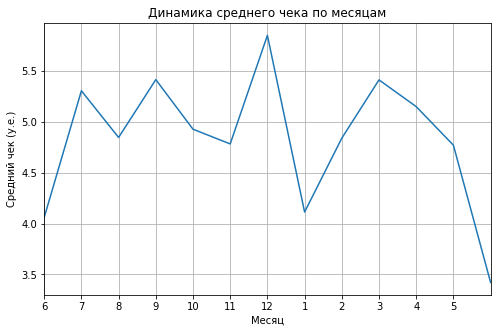

In [35]:
avg_bill['avg_bill'].plot(grid = True, figsize = (8, 5)).set(
    title='Динамика среднего чека по месяцам',
    ylabel= 'Средний чек (у.е.)',
    xlabel = 'Месяц')
plt.xticks(range(0, len(new)), new['month'])
plt.show()

**Вывод:** В среднем, средний чек от месяца к месяцу не изменяется, но вот декабрь и январь выделяются из всего года. До нового года, средний чек резко возрастает, а после столь же стремительно падает. Моё предположение, что это не клиенты охотнее тратят деньги перед новым годом, а после лотают дыры в бюджете, а просто предновогоние мероприятия стоят в среднем дороже, а вот в январе, на мой взгляд, люди действительно могут подходить к тратам более обдуманно.

#### Lifetime Value

Для рассчета данного показателя я использую информацию о покупках: вычислю месяц первой покупки пользователя для объединения в когорты, определю месяц каждой покупки, для определения на каком этапе жизни когорты покупка была совершена, вычислю выручку для каждой когорты по месяцам, вычислю количество уникальных покупателей в каждой когорте и на основе этих данным смогу вычислить, а зачем визуализировать LTV:

In [36]:
first_purchase_date = orders.groupby(['uid'])['buy_ts'].min()
first_purchase_date.name = 'first_purchase_date'
cohorts_orders = orders.join(first_purchase_date, on = 'uid')
cohorts_orders['first_purchase_month'] = cohorts_orders['first_purchase_date'].astype('datetime64[M]')
cohorts_orders['cohort_lifetime'] = ((cohorts_orders['purchase_month'] - cohorts_orders['first_purchase_month']) / np.timedelta64(1, 'M')).round().astype('int')

orders_first_6_cohorts = cohorts_orders[cohorts_orders['first_purchase_month'] < '2018-01-01']

orders_first_6_cohorts.head()

,buy_ts,revenue,uid,purchase_month,first_purchase_date,first_purchase_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01,0


In [37]:
ltv_count = orders_first_6_cohorts.groupby(['first_purchase_month', 'cohort_lifetime']).agg({'revenue': 'sum'}).reset_index()
ltv_count.columns = ['first_purchase_month', 'cohort_lifetime', 'revenue']

cohort_sizes = (
    orders_first_6_cohorts.groupby('first_purchase_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_purchase_month', 'n_buyers']
ltv_count = ltv_count.merge(cohort_sizes, on = 'first_purchase_month')
ltv_count['ltv'] = ltv_count['revenue'] / ltv_count['n_buyers']
ltv_count['first_purchase_month'] = ltv_count['first_purchase_month'].astype('str')
ltv_count

,first_purchase_month,cohort_lifetime,revenue,n_buyers,ltv
0,2017-06-01,0,9557.49,2023,4.724414
1,2017-06-01,1,981.82,2023,0.485329
2,2017-06-01,2,885.34,2023,0.437637
3,2017-06-01,3,1931.30,2023,0.954671
4,2017-06-01,4,2068.58,2023,1.022531
...,...,...,...,...,...
58,2017-12-01,1,1141.22,4383,0.260374
59,2017-12-01,2,4054.70,4383,0.925097
60,2017-12-01,3,4669.10,4383,1.065275
61,2017-12-01,4,1371.57,4383,0.312930


Так как маржинальность сервиса — 100%, то прибыль равна выручке и мы можем её не вычислять и не создавать для нее отдельный столбец:

In [38]:
margin_rate = 1
output = ltv_count.pivot_table(
    index='first_purchase_month', columns='cohort_lifetime', values='ltv', aggfunc='mean'
).round(2)
output = output.cumsum(axis=1).round(2) 

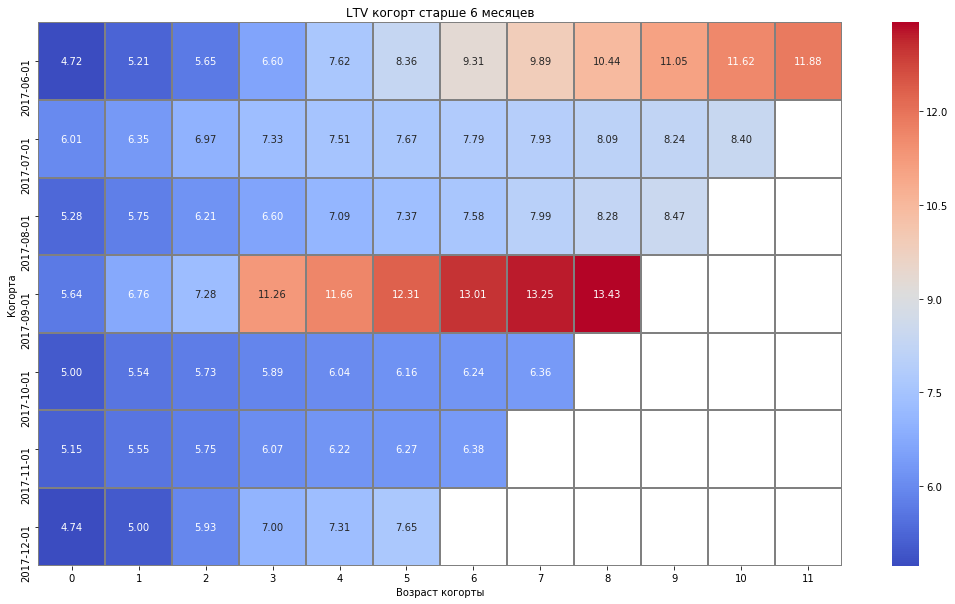

In [39]:
plt.figure(figsize=(18, 10))
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm').set(
    title='LTV когорт старше 6 месяцев',
    ylabel= 'Когорта',
    xlabel = 'Возраст когорты') 
plt.show()

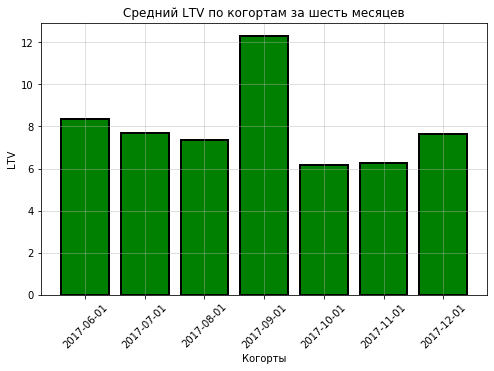

In [40]:
output[5]
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(output.index, output[5], color = 'green', edgecolor='black', linewidth = 2)
ax.set(title='Средний LTV по когортам за шесть месяцев',
       ylabel= 'LTV',
       xlabel = 'Когорты')
plt.xticks(rotation=45)
plt.grid(alpha = 0.5)
plt.show()

In [41]:
print()
print('Средний LTV за 6 месяцев, для когорт "проживших" 6 и более месяцев, составляет:', (ltv_count[ltv_count['cohort_lifetime'] < 6]['revenue'].sum() / cohort_sizes['n_buyers'].sum()).round(2), 'y.e.')


Средний LTV за 6 месяцев, для когорт "проживших" 6 и более месяцев, составляет: 7.7 y.e.


**Вывод:** 
- Средний LTV за 6 месяцев, для когорт "проживших" 6 и более месяцев, составляет: 7.7 y.e.
- Как видно из последнего графика, в среднем LTV разных когорт на 6ой месяц жизни близки друг к другу, но сентярбьская когорта выделяется более 50%-ым опережением.

### Маркетинговые

#### Общая сумма расходов на маркетинг

Для начала посмотрим общие расходы на маркетинг за рассматриваемый год:

In [42]:
print()
print('общие расходы на маркетинг в период с 1 июня 2017 по 31 мая 2018 равны:', costs['costs'].sum(), 'y.e.')


общие расходы на маркетинг в период с 1 июня 2017 по 31 мая 2018 равны: 329131.62 y.e.


Теперь взглянем на эти данные сгруппированные по источникам трафика:

In [43]:
costs.groupby('source_id').agg({'costs': 'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Посмотрим на расходы на маркетинг по месяцам:

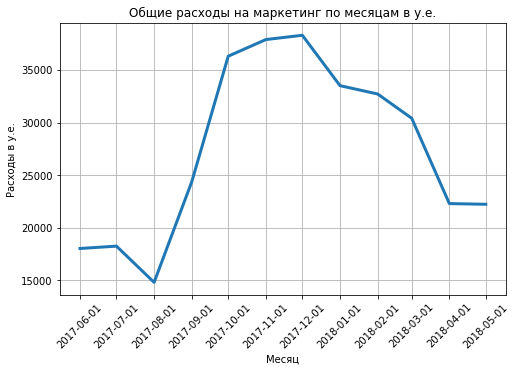

In [44]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(costs.groupby('dt_month').agg({'costs': 'sum'}).reset_index()['dt_month'],
        costs.groupby('dt_month').agg({'costs': 'sum'}).reset_index()['costs'], linewidth = 3)
ax.set(
    title='Общие расходы на маркетинг по месяцам в у.е.',
    ylabel= 'Расходы в у.е.',
    xlabel = 'Месяц')
plt.xticks(costs['dt_month'].unique(), rotation=45)
ax.grid()
plt.show()

Ну и последним шагом рассмотрим динамику расходов на маркетинг по источникам трафика за анализируемый год:

In [45]:
result = costs.groupby(['source_id', 'dt_month']).agg({'costs': 'sum'}).reset_index()
result.head()

,source_id,dt_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


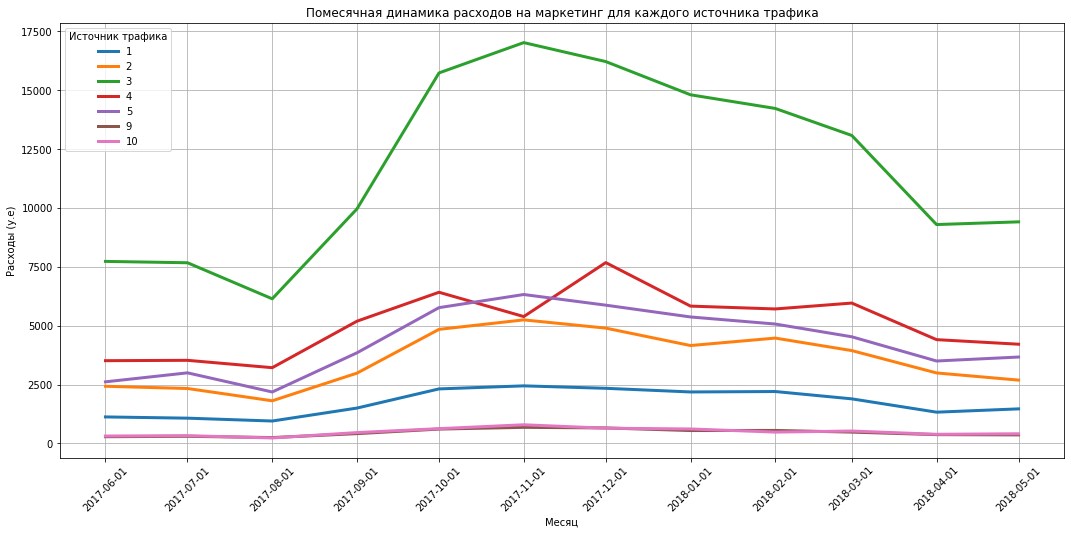

In [46]:
fig, ax = plt.subplots(figsize=(18, 8))
for source_id in result['source_id'].unique():
    x = result[result['source_id'] == source_id]['dt_month']
    y = result[result['source_id'] == source_id]['costs']
    ax.plot(x, y, label = source_id, linewidth = 3)
    
ax.grid()    
ax.legend(loc='upper left', title = 'Источник трафика')    
ax.set(title='Помесячная динамика расходов на маркетинг для каждого источника трафика',
       ylabel= 'Расходы (у.е)',
       xlabel = 'Месяц')    
plt.xticks(result['dt_month'].unique(), rotation=45)
plt.show()

**Вывод:**
- Общие расходы на маркетинг в период с 1 июня 2017 по 31 мая 2018 составили 329131.62 y.e.
- Наибольшие расходы на маркетинг на протяжении всего периода выделялись на источник трафика №3.
- Месяц с самым низким общим бюджетом на маркетинг - август 2017.
- Месяц с самым высоким общим бюджетом на маркетинг - декабрь 2017.

#### Расчёт CAC

Для расчёта САС нам понадобится информация о количестве посетителей в каждой когорте и общие расходы на маркетинг за этот же период:

In [47]:
n_users = orders_first_act.groupby('first_act_month').agg({'uid': 'nunique'}).reset_index()
n_users.columns = ['month', 'n_users']
costs_month = costs.groupby(['dt_month']).agg({'costs': 'sum'}).reset_index()
costs_month.columns = ['month', 'costs']
cac_count = n_users.merge(costs_month, on = 'month')
cac_count['cac'] = cac_count['costs'] / cac_count['n_users']
cac_count

,month,n_users,costs,cac
0,2017-06-01,2923,18015.00,6.163189
1,2017-07-01,2458,18240.59,7.420907
2,2017-08-01,1721,14790.54,8.594155
3,2017-09-01,3058,24368.91,7.968905
4,2017-10-01,4678,36322.88,7.764617
5,2017-11-01,4262,37907.88,8.894388
6,2017-12-01,4074,38315.35,9.404848
7,2018-01-01,3119,33518.52,10.746560
8,2018-02-01,3186,32723.03,10.270882
9,2018-03-01,2838,30415.27,10.717149


In [48]:
print()
print('Средний САС за рассмтариваемый период без разделения по источникам трафика равен:', cac_count['cac'].mean().round(2), 'y.e.')


Средний САС за рассмтариваемый период без разделения по источникам трафика равен: 9.11 y.e.


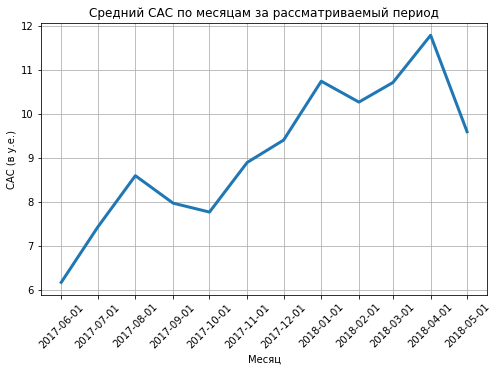

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(cac_count['month'],
        cac_count['cac'],
        linewidth = 3)
plt.xticks(cac_count['month'].unique(), rotation=45)
ax.grid()
ax.set(title='Средний CAC по месяцам за рассматриваемый период',
       ylabel= 'CAC (в у.е.)',
       xlabel = 'Месяц')
plt.show()

По графику видно, что из месяца в месяц стоимость привлечения новых покупателей растет, за исключением сентября, октября 2017, когда люди сами охотнее пользуются подобными сервисами, и мая 2018. Кто знает, может в этот месяц люди ринулись покупать билеты на ЧМ по футболу через Яндекс.Афишу? :)

Теперь высчитаем САС для источников трафика:

In [50]:
# Прикручиваю информацию о использованном источнике трафика при первом посещении:
orders_first_act_2 = orders_first_act.merge( 
    user_activity[user_activity['start_ts'] == user_activity['first_act_date']][['uid', 'source_id']],
    on = 'uid'
)
orders_first_act_2.head()

,buy_ts,revenue,uid,first_act_date,time_before_order_min,first_act_month,purchase_month,cohort_lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01,0,3


In [51]:
n_users_sourses = orders_first_act_2.groupby(['source_id', 'first_act_month']).agg({'uid': 'nunique'}).reset_index()
n_users_sourses.columns = ['source_id', 'month', 'n_users']

costs_month_sourse = costs.groupby(['source_id', 'dt_month']).agg({'costs': 'sum'}).reset_index()
costs_month_sourse.columns = ['source_id', 'month', 'costs']

cac_sourse_count = n_users_sourses.merge(costs_month_sourse, on = ['source_id', 'month'])
cac_sourse_count['cac'] = cac_sourse_count['costs'] / cac_sourse_count['n_users']
cac_sourse_count

,source_id,month,n_users,costs,cac
0,1,2017-06-01,240,1125.61,4.690042
1,1,2017-07-01,184,1072.88,5.830870
2,1,2017-08-01,126,951.81,7.554048
3,1,2017-09-01,248,1502.01,6.056492
4,1,2017-10-01,350,2315.75,6.616429
...,...,...,...,...,...
79,10,2018-01-01,103,614.35,5.964563
80,10,2018-02-01,113,480.88,4.255575
81,10,2018-03-01,166,526.41,3.171145
82,10,2018-04-01,98,388.25,3.961735


In [52]:
avg_cac = cac_sourse_count.groupby('source_id').agg({'costs': 'sum'}).reset_index().merge(cac_sourse_count.groupby('source_id').agg({'n_users': 'sum'}).reset_index(),
                                                                                          on = 'source_id')
avg_cac['cac'] = avg_cac['costs'] / avg_cac['n_users']
avg_cac

,source_id,costs,n_users,cac
0,1,20833.27,2899,7.186364
1,2,42806.04,3506,12.209367
2,3,141321.63,10473,13.493901
3,4,61073.60,10296,5.931779
4,5,51757.10,6931,7.467479
5,9,5517.49,1088,5.071222
6,10,5822.49,1329,4.381106


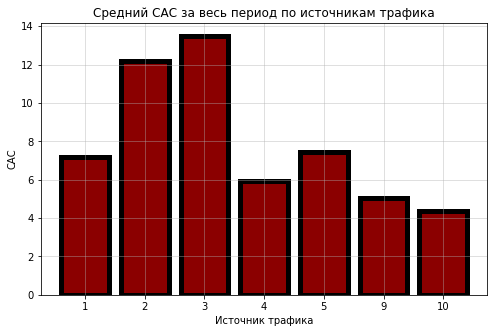

In [53]:
output[5]
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(avg_cac.index, avg_cac['cac'], color = 'darkred', edgecolor='black', linewidth = 5)
ax.set(title='Средний САС за весь период по источникам трафика',
       ylabel= 'САС',
       xlabel = 'Источник трафика')
plt.xticks(range(0,len(avg_cac.index)), avg_cac['source_id'])
plt.grid(alpha = 0.5)
plt.show()

Отразим изменения метрик по месяцам на графиках:

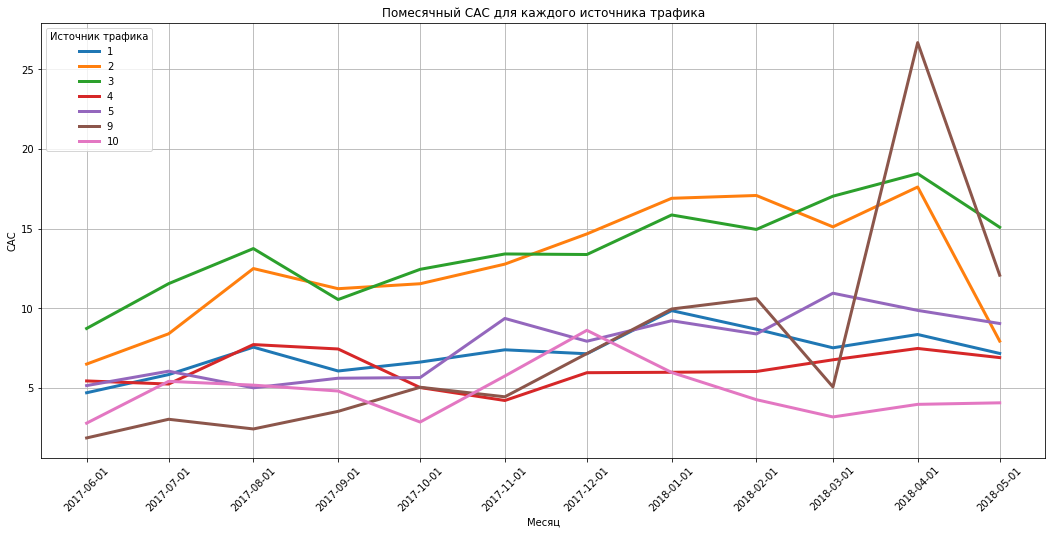

In [54]:
fig, ax = plt.subplots(figsize=(18, 8))
for source_id in cac_sourse_count['source_id'].unique():
    x = cac_sourse_count[cac_sourse_count['source_id'] == source_id]['month']
    y = cac_sourse_count[cac_sourse_count['source_id'] == source_id]['cac']
    ax.plot(x, y, label = source_id, linewidth = 3)
    
ax.grid()    
ax.legend(loc='upper left', title = 'Источник трафика')    
ax.set(title='Помесячный САС для каждого источника трафика',
       ylabel= 'САС',
       xlabel = 'Месяц')    
plt.xticks(cac_sourse_count['month'].unique(), rotation=45)
plt.show()

**Выводы:**
- Средний САС за рассмтариваемый период без разделения по источникам трафика равен: 9.11
- Самый низкий САС за рассмтариваемый период без разделения по источникам трафика был в июне 2017 - 6.16, а самый высокий в апреле 2018 - 11.79
- Самый высокий средний САС у 3го источника трафика - 13.49
- Самый низкий средний САС у 10го источника трафика - 4.38

####  Расчёт ROMI по когортам в разрезе источников

In [55]:
ltv_sourse = orders_first_act_2.groupby(['source_id', 'first_act_month', 'cohort_lifetime']).agg({'revenue': 'sum'}).reset_index()
ltv_sourse.columns = ['source_id', 'first_act_month', 'cohort_lifetime', 'revenue']

cohort_sizes_sourse = (
    orders_first_act_2.groupby(['source_id', 'first_act_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_sourse.columns = ['source_id', 'first_act_month', 'n_buyers']
ltv_sourse = ltv_sourse.merge(cohort_sizes_sourse, on = ['source_id', 'first_act_month'])

costs_month_sourse.columns = ['source_id', 'first_act_month', 'costs']

final_data = ltv_sourse.merge(costs_month_sourse, on = ['source_id', 'first_act_month'])
final_data['ltv'] = final_data['revenue'] / final_data['n_buyers']
final_data['cac'] = final_data['costs'] / final_data['n_buyers']
final_data['romi'] = final_data['ltv'] / final_data['cac']
final_data['first_act_month'] = final_data['first_act_month'].astype('str')
final_data.head()

,source_id,first_act_month,cohort_lifetime,revenue,n_buyers,costs,ltv,cac,romi
0,1,2017-06-01,0,1378.70,240,1125.61,5.744583,4.690042,1.224847
1,1,2017-06-01,1,662.73,240,1125.61,2.761375,4.690042,0.588774
2,1,2017-06-01,2,683.12,240,1125.61,2.846333,4.690042,0.606889
3,1,2017-06-01,3,1613.45,240,1125.61,6.722708,4.690042,1.433401
4,1,2017-06-01,4,1055.58,240,1125.61,4.398250,4.690042,0.937785


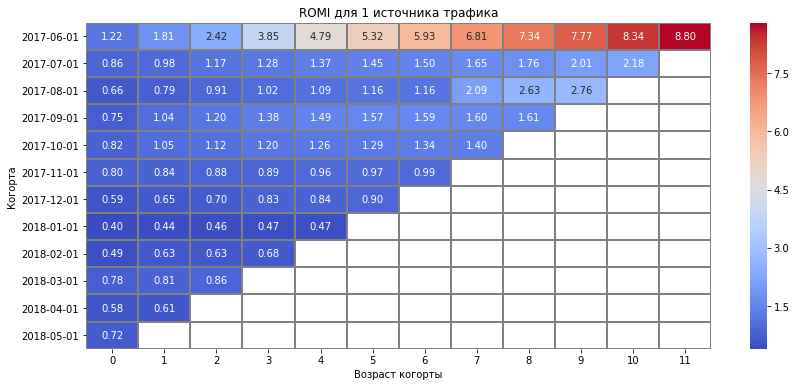

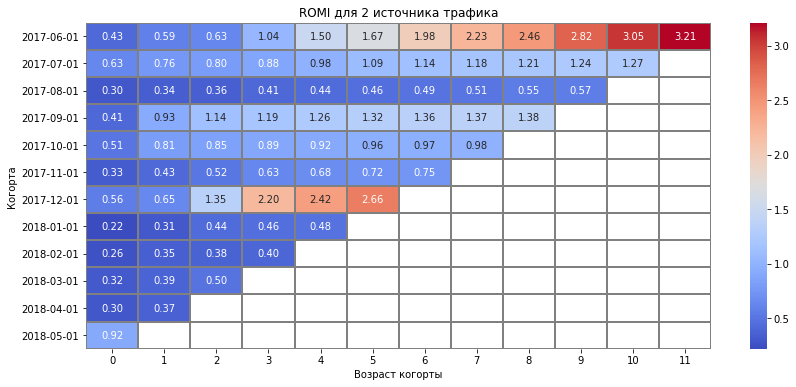

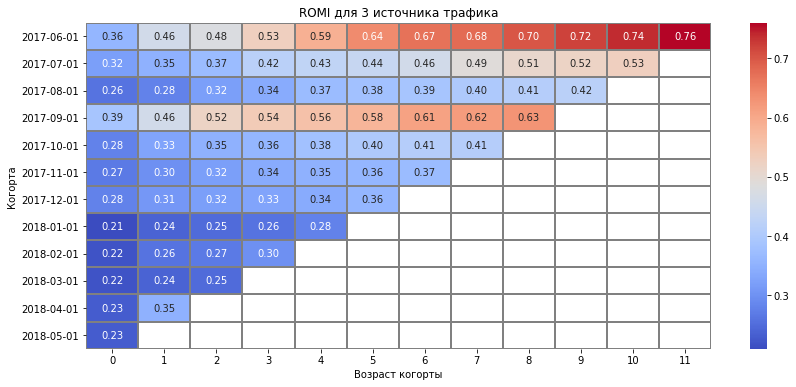

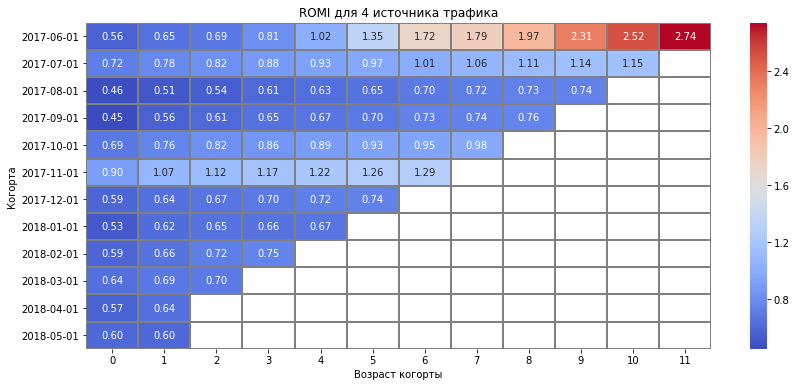

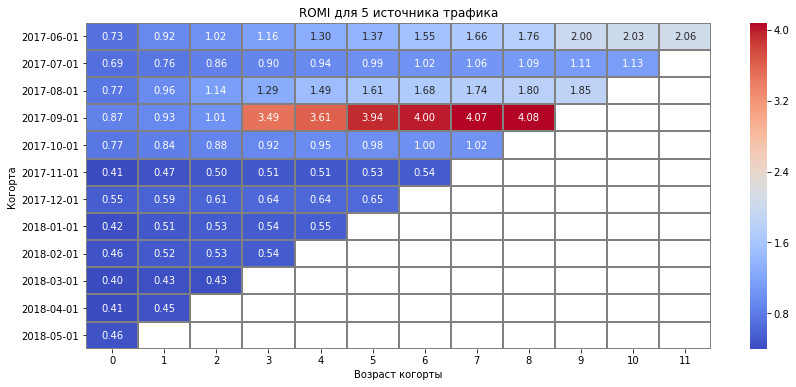

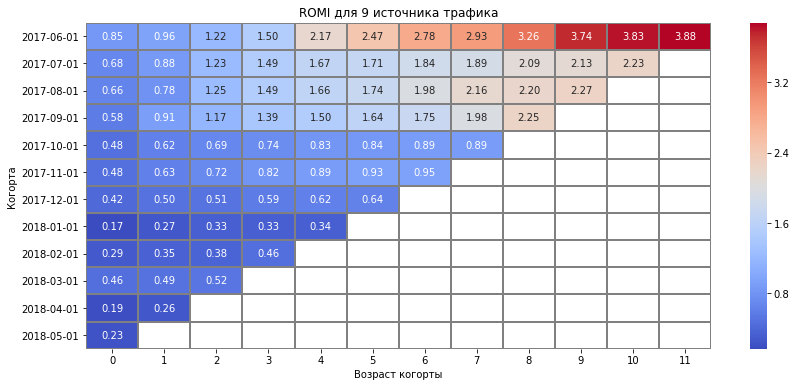

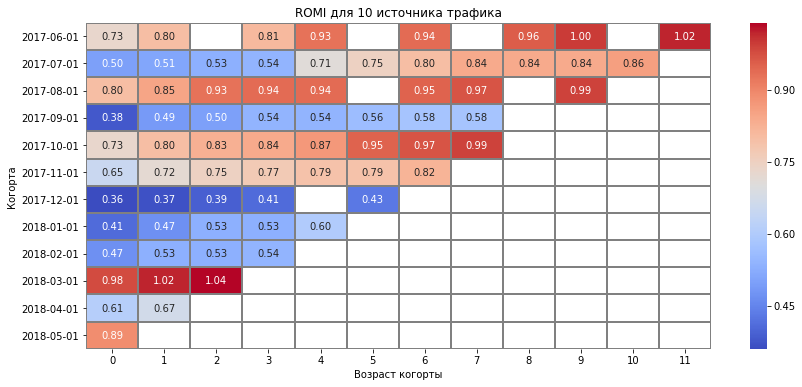

In [56]:
for i in final_data['source_id'].unique():
    output_2 = final_data[final_data['source_id'] == i].pivot_table(
        index='first_act_month', columns='cohort_lifetime', values='romi', aggfunc='mean'
    )
    output_2 = output_2.cumsum(axis = 1).round(2)
    plt.figure(figsize=(14, 6))
    sns.heatmap(output_2, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'coolwarm').set(
        title= 'ROMI для {} источника трафика'.format(i),
        ylabel= 'Когорта',
        xlabel = 'Возраст когорты')  
    plt.show()

**Вывод:** 
- 1 источник трафика в первых пяти когортах показывал отличные показалели окупаемости привлечения клиентов: это происходило на 1-4 месяц жизин когорты, однако в дальнейшем, не смотря на высокий показатель в первый месяц жизни когорты, дальше ROMI рос крайне медленно.
- У 2 источника трафика, как видно из тепловой карты, в целом все относительно неплохо, присутствуют несколько когорт с крайне медленным ростом ROMI, однако остальные достигают единицы уже к 4-5 месяцу жизни.
- У 3 источника трафика ни одна кагорта так и не окупила стоимость привлечения клиента. Полный провал источника.
- У 4 источника трафика июньская, июльская и ноябрьская когорты окупились, а остальные так и не достигли минимального желаемого значения, однако, более молодые когорты имеют все больший и больший темп роста показателя ROMI, это свидетельствует об увеличении КПД данного источника?!
- 5 источник трафика до ноября имел довольно неплохие показатели, но, в дальнейшем, начал сильно проседать по ROMI.
- 9 источник трафика имеет неплохие показатели для 4 первых когорт, но более молодые уже не могут похвастаться той же окупаемостью.
- Для 10 источника трафика характерна большая вариация показателя ROMI в самый первый месяц существования когорт - он варьируется от 0.36 до 0.98, но в дальнейшем, покупатели, пришедшие из этого источника отличаются крайней пассивностью, ведь рост ROMI происходит крайне медленно.

## Шаг 3. Выводы и рекомендации

### Перспективы источников трафика

Мы имеем 7 разных источников трафика. Думаю, стоит вывесли основную информацию по ним повторно, и проанализировать каждый:

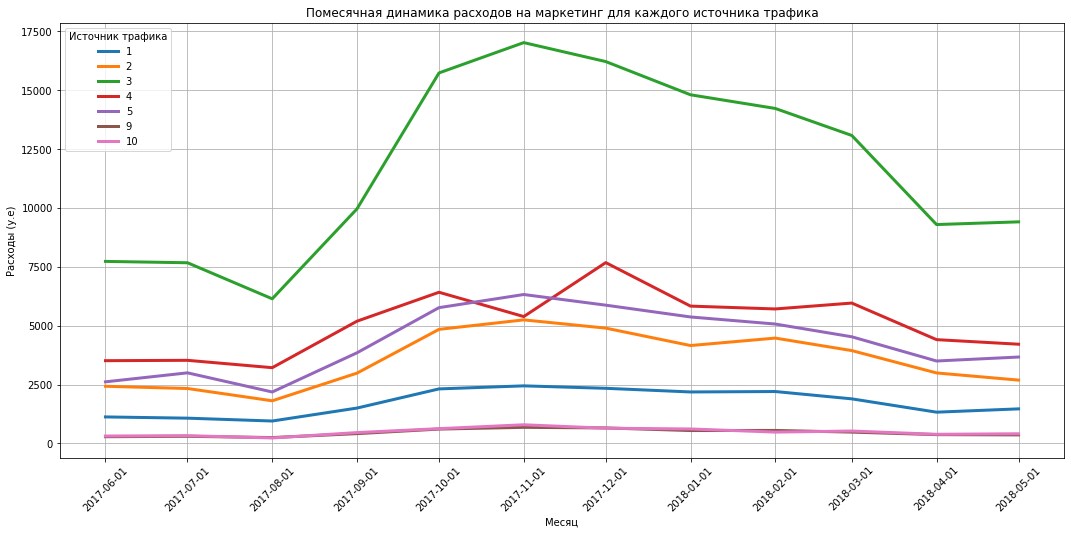

In [57]:
fig, ax = plt.subplots(figsize=(18, 8))
for source_id in result['source_id'].unique():
    x = result[result['source_id'] == source_id]['dt_month']
    y = result[result['source_id'] == source_id]['costs']
    ax.plot(x, y, label = source_id, linewidth = 3)
    
ax.grid()    
ax.legend(loc='upper left', title = 'Источник трафика')    
ax.set(title='Помесячная динамика расходов на маркетинг для каждого источника трафика',
       ylabel= 'Расходы (у.е)',
       xlabel = 'Месяц')    
plt.xticks(result['dt_month'].unique(), rotation=45)
plt.show()

In [58]:
avg_cac

,source_id,costs,n_users,cac
0,1,20833.27,2899,7.186364
1,2,42806.04,3506,12.209367
2,3,141321.63,10473,13.493901
3,4,61073.60,10296,5.931779
4,5,51757.10,6931,7.467479
5,9,5517.49,1088,5.071222
6,10,5822.49,1329,4.381106


**1 источник:** Расходы на данный источник в течение года изменялись не сильно, видно лишь небольшое увеличение на период большего сезонного спроса (осень-зима), но, при этом окупаемость привлечения клиента для первой когорты рекордная! Единственный источник трафика и единственная когорта из 84 комбинаций (7 источников Х 12 когорт), в которой стоимость привлечения покупателя окупилась в первый же месяц жизни когорты! Следующие когорты показывают тоже неплохие результаты с окупаемостью примерно в 3 месяца. Во второй половине года виден спад скорости окупаемости, но на фоне остальных источников, 1ый все ещё остается лидером.

Моё мнение: стоит сделать упор на этот источник.

**2 источник:** Имеет хорошие показатели ROMI для первых 2ух когорт, а так же тех, которые образованы в месяцы увеличения бюджета, которые совпадают с сезонным увеличением спроса. В весенне-летний период показатели осталвяют желать лучшего. Источник с очень высоким САС, однако во высокий сезон это не мешает окупать расходы и зарабатывать.

Моё мнение: в летне-осенний сезон увеличение бюджета, в зимне-весенний более сильное урезание, т.к. ROMI очень низкий, и, при этом, высокий САС говорят о больших убытках.

**3 источник:** Самый высокий бюджет и самый большой провал. Ни одна из когорт не окупила своего привлечения, стоимость которого самая высокая среди всех источников. Количество привлеченных покупателей практически идетнично кол-ву 4го источника трафика с более чем в 2 раза меньшим бюджетом и стоимостью привлечения клиентов.

Моё мнение: значительное снижение бюджета либо полный отказ от источника.

**4 источник:** 2ое место по кол-ву привлеченных покупателей при одном из самых низких САС. Однако ROMI довольно низкий и из 12 когорт за анализируемый год окупились всего 3 и рост довольно медленный, однако, во второй половине года, когда остальные источники ощутимо проседают, этот остается на относительно высоком уровне. Кроме того, если обратить внимание на первую когорту, окупалась она довольно долго, но после начала приносить гораздо быстрее прибыль. Возоможно, данный источник, привлекает клиентов с хорошим уровнем Retention Rate.

Моё мнение: Стоит обратить внимание на этот источник. Если "история" первой когорты не единичный случай, то данный источник привлечет много постянных клиентов.

**5 источник:** 3ий по бюджету и привлечению новых покупателей. Первая пять месяцев говорят о хорошем потенцеале окупаемости. Особое внимание стоит обратить та произошедшее в сетнябре 2017 - если была какая-то рекламная кампания, она явно имела успех и стоит к ней прибегнуть снова. 

Моё мнение: Хороший источник, требующий дополнительного анализа для принятия решения об увеличении бюджета.

**9 источник:** самый маленький бюджет рекламной кампании и самое маленькое кол-во привлеченных покупателей, однако, САС один из самых низких. Первые 4 когорты окупились уже на 3ий месяц и продолжили приносить прибыль впоследствии. В зимне-весенний период показтели не утешительны. Скорее всего, источник сильно подвержен влиянию сезонности.

Моё мнение: В летне-осенний период однозначно стоит того, чтобы попытаться увеличить бюджет и сделать бОльшую ставку на него.

**10 источник:** Самые низкие расходы на привлечение одного клиента, но, при этом, все, что смогли добиться несколько когорт, это выйти в ноль. Прибыль из этого источника ждать не стоит, ведь, если она и придет, то будет чисто символической.

Моё мнение: источник способин себя окупить, но принести прибыль - вряд ли. Стоит оставить, если есть цель охватить как можно больше источников трафика.

**Общий вывод:** Для начала нам стоит узнать цели бизнеса на ближайшее время, ведь от них зависит стратегия по выбору источников трафика: если на данный момент нас в первую очередь интересует наращивание аудитории, то стоит выбирать источники с наименьшей стоимостью привлечения клиента. Есди же нас интересует прибыль, то стоит выбирать источники, которые быстро окупаются и начинают её приносить.

В первом случае нам стоит обратить внимание на 1, 2 и 4 источники, так как их показатель САС относительно не высок, а окупаемость находится на довольно высоком уровне.

Во втором случае наш выбор 1 и 4, а так же 2 и 9 источники в летне-осенний период.

**!!! Чего точно не стоит делать, так это продолжать кампанию самых больших надежд на 3ий источник - однозначное урезание бюджетов или даже полный отказ - его будущее!!**

### Выводы по маркетинговым, продуктовым и метрикам электронной коммерции

- За анализируемый год сайт Яндекс.Афиша привлекал в среднем 907 пользователей в день, 5716 в неделю или 23228 в месяц. Чаще всего эти посетители заходят на сайт всего один раз в день и сессия длилась около 300 секунд.
- Средний Retention Rate на второй месяц «жизни» когорт: 6.52%. На мой взгляд, это адекватный показатель для сервиса типа Яндекс.Афиша, т.к. посещение кино/театров/музеев и прочих образовательных и развлекательных мероприятий не самая дешевая активность, поэтому она далеко не для каждого жителя нашей страны актуальна, а тем более на постоянной основе.

- 49% совершается в первую минуту активности на сайте. Это связано с тем, что большое количество покупок совершается с других сайтов, а переход на Яндекс.Афишу совершается лишь в момент оформления покупки.
- Около 22% пользователей совершают покупку не в день первой активности на сайте.
- За первые пол года после появления на сайте, покупатели совершают в среднем 1.39 покупки. Это значает, что хоть повторные покупки и есть, их довольно мало. Думаю, это связано со спецификой продаваемого товара, а так же с выбранным периодом анализа. Если рассмотреть хотя бы ход, относительное кол-во повторных покупок, на мой взгляд, будет выше, т.к. например, какие-то пользователи могут посещать лишь одно мероприятие, но каждый год.
- Средний чек составляет 5.0 у.е. однако, есть существенный рост в предновогоднее время и последующий январский спад.
- Следнее LTV для когорт, проживших более полу года, составляет 7.7, но есть однозначный лидер - сентябрьская когорта со значением 12.31 при относительно низком показателе САС. Однозначно стоит провести подробный анализ пройзошедшего в сентябре.

- Общие расходы на маркетинг в период с 1 июня 2017 по 31 мая 2018 составили 329131.62 y.e. Наибольший бюджет получил 3ий источник трафика, показавший худшие результаты окупаемости. Да, он привлек наибольшее число клиентов, но стоимость привлечения оказалась большой, особенно по сравнению с 4ым источником, который сумел привлечь практически столько же покупателей при в 2.5 раза меньшем бюджете.
- Средний САС за рассмтариваемый период без разделения по источникам трафика равен: 9.11 y.e. Как можно понять из представленнои инмормации, данный бизнес имеет сезонность, которая влияет на все показатели, включая стоимость привлечения новых клиентов. Если в высокий сезон САС находится на уровне ~8 y.e., то в не сезон этот показатель близок к ~10.5 у.е.
- Исходя из занных за анализируемый год по окупаемости привлечения клиентов, однозначным аутсайдером является 3 источник трафика. Чуть лучшие, но все еще отрицательные показатели имеет 10ый, а успешными, на мой взгляд, можно назвать 1, 2, 5 и 9, но, опять же, коррекцией на сезонность и анализом произошедшего у некоторых из когорт, например 1ых для 1, 2, 4 и 9 источников или у 7ой для 2го источника и 4ой когорты у 5го источника трафика.

### Итоги когортного анализа

Как я уже неоднократно отмечал, данный бизнес имеет сезонность, но она более сложная, чем в обычном понимании этого явления. Например, билеты в зоопарк и на чемпионат мира по футболу (который проходит летом всегда (кроме грядущего в Катаре), поэтому их продажи велики весной-летом и практически отсутствуют в другое время года. А, например, театр летом уходит в отпуск и не проводит никаких мероприятий, а основные продажи у них могут быть в холодное время года, когда количество мероприятий на открытом воздухе значительно снижается. Все это непосредственно влияет на успешность когорт!

По результатам моего анализа, я считаю наиболее успешными когорты с июня 2017 года по октябрь 2017 года за их самые высокие показатели LTV, при, одновременно, самых низких затратах на привлечение (САС) и, соответственно лучшие показатели ROMI.

Отдельно бы хотел выделить июньскую и сентябрьскую когорты. Произошедшее в эти месяцы должно быть проанализировано более подробно, т.к. показатели относительно других месяцов просто великолепные и тут явно не обошлось без какого-то значимого мирового события или успшной рекламной компании от маркетологов Яндекс.Афиши!